## Examen Python pour la data science

### Prénom : Ibrahima
### Nom : Sylla
### Filière : AGR 3

### Introduction
Ce projet de data science vise à explorer et analyser des données relatives à la pandémie de COVID-19, nous allons examiner les tendances et les indicateurs clés associés aux cas de COVID-19, aux décès et aux mesures de restriction des pays. En utilisant des techniques d'analyse de données et de visualisation, nous allons chercher à extraire des données significatives afin de mieux comprendre son impact.

### Importation des données

In [186]:
import pandas as pd

transformed_data = pd.read_csv("./donnees_projet_2024/transformed_data.csv")

aggregated_data = transformed_data.groupby('CODE').agg({
    'HDI': 'first',
    'COUNTRY': 'first',
    'TC': 'sum',
    'TD': 'sum',
    'STI': 'first',
    'POP': 'mean',
    'GDPCAP': 'mean'
}).reset_index()

print('Données agrégées')
print(aggregated_data.head())


Données agrégées
  CODE    HDI      COUNTRY           TC           TD       STI        POP  \
0  ABW    NaN        Aruba  1187.113062   306.947174  0.000000  11.578395   
1  AFG  0.498  Afghanistan  2000.646094  1226.948181  0.000000  17.477233   
2  AGO  0.581       Angola  1203.978763   590.138675  2.407846  17.307957   
3  AIA    NaN     Anguilla   224.574488     0.000000  4.266896   9.615939   
4  ALB  0.785      Albania  1702.240756   929.368800  3.586570  14.872537   

      GDPCAP  
0  10.490546  
1   7.497754  
2   8.668969  
3   0.000000  
4   9.376146  


### Analyse des données
L'histogramme suivant montre la fréquence des cas de COVID-19.

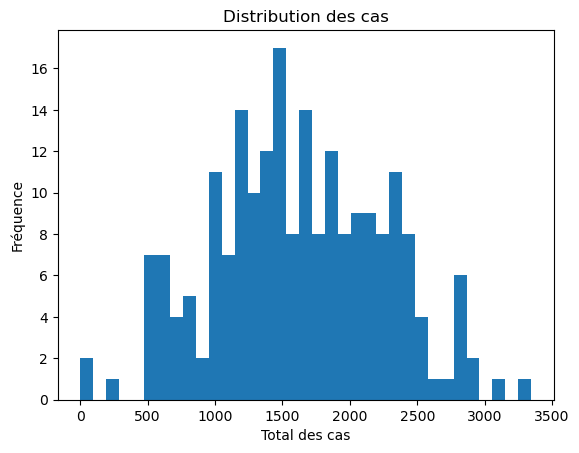

In [187]:
import matplotlib.pyplot as plt

plt.hist(aggregated_data['TC'], bins=35)
plt.title('Distribution des cas')
plt.xlabel('Total des cas')
plt.ylabel('Fréquence')
plt.show()

On peut voir sur ce graphique qu'il y a eu en moyenne autour des 1500 cas de COVID-19 dans les pays au cours de l'année, même si les chiffres sont assez dispersés.
On constate aussi que les pays ayant eu un nombre de morts faible sont très peu nombreux et de même pour les pays ayant eu un nombre de morts très haut, supérieur à 3000.

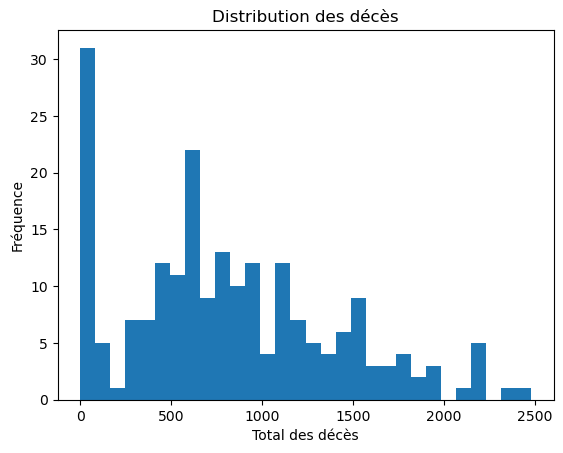

In [188]:
import matplotlib.pyplot as plt

plt.hist(aggregated_data['TD'], bins=30)
plt.title('Distribution des décès')
plt.xlabel('Total des décès')
plt.ylabel('Fréquence')
plt.show()

Sur ce graphique, on constate que 20 des pays ont eu 0 décès et que la plupart ont eu entre 250 et 1500 décès dans l'année.
Mais ces chiffres sont à nuancer par le fait que la plupart des pays qui ont 0 mort ont un indice de rigueur très faible. Donc on ne peut pas affirmer avec certitude que ces chiffres sont fiables.

L'histogramme suivant démontre ce fait en montrant que la fréquence d'apparition des indices de rigueur faibles sont assez similaires à la fréquence nombre de cas de décès dans les pays.

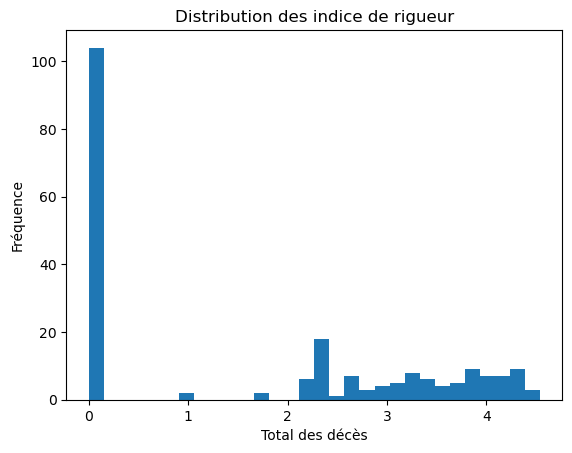

In [189]:
import numpy as np

plt.hist(aggregated_data['STI'], bins=30)
plt.title('Distribution des indice de rigueur')
plt.xlabel('Total des décès')
plt.ylabel('Fréquence')
plt.show()

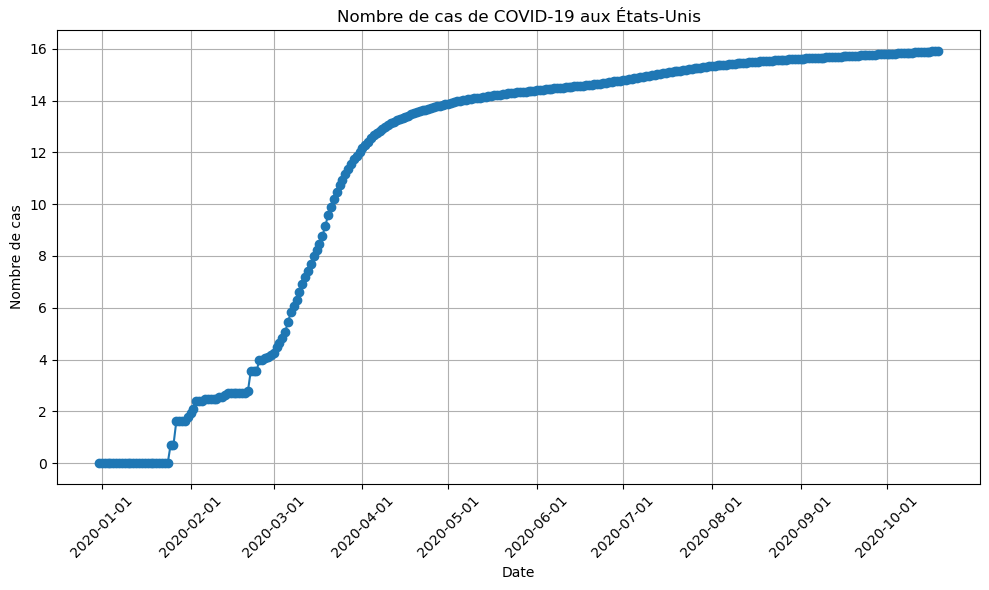

In [190]:
pd.options.mode.copy_on_write = True

usa_data = transformed_data.loc[transformed_data['CODE'] == 'USA']
usa_data['DATE'] = pd.to_datetime(usa_data['DATE'])

usa_data = usa_data.sort_values(by='DATE')

start_date = usa_data['DATE'].min()
end_date = usa_data['DATE'].max()

dates = pd.date_range(start=start_date, end=end_date, freq='MS')

plt.figure(figsize=(10, 6))
plt.plot(usa_data['DATE'], usa_data['TC'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas de COVID-19 aux États-Unis')
plt.xticks(dates, [date.strftime('%Y-%m-%d') for date in dates], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Ce graphique montre l'évolution des cas de COVID-19 pour les États-Unis jusqu'en Octobre 2020. Au début de la période, les chiffres semblent stables, mais à partir de fin janvier 2020, il y a une augmentation croissante. Cette période correspond au début de la pandémie. On a vu aussi qu'à partir d'Avril 2020 les chiffres se stabilisent progressivement autour les 15 cas de COVID-19 par jour.

Le graphique suivant montre également une évolution similaire concernant les cas de décès au sein des Etats-Unis.


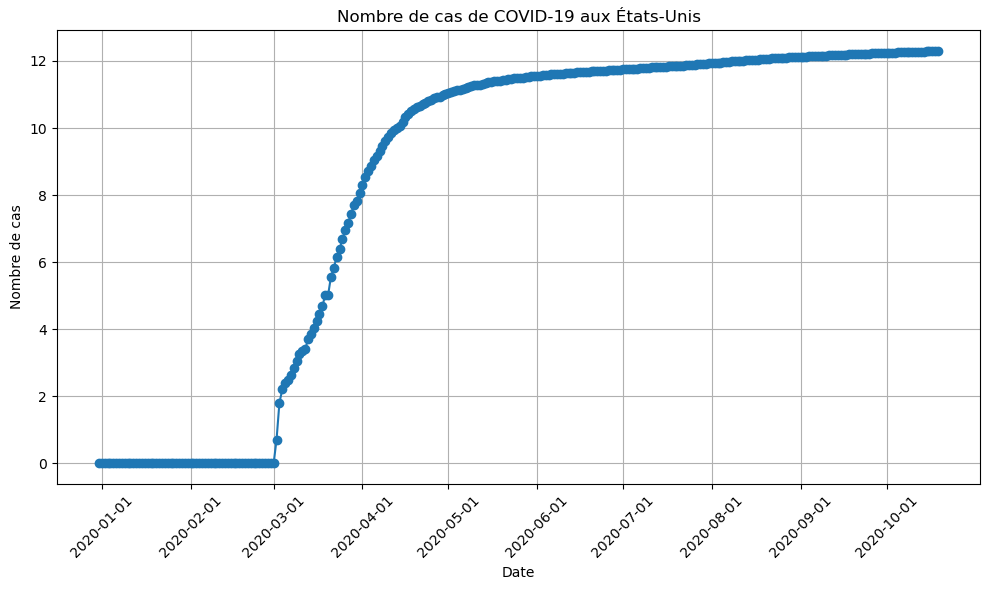

In [191]:
usa_data = transformed_data.loc[transformed_data['CODE'] == 'USA']
usa_data['DATE'] = pd.to_datetime(usa_data['DATE'])

usa_data = usa_data.sort_values(by='DATE')

start_date = usa_data['DATE'].min()
end_date = usa_data['DATE'].max()

dates = pd.date_range(start=start_date, end=end_date, freq='MS')

plt.figure(figsize=(10, 6))
plt.plot(usa_data['DATE'], usa_data['TD'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas de COVID-19 aux États-Unis')
plt.xticks(dates, [date.strftime('%Y-%m-%d') for date in dates], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
